In [1]:
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
BASE_DIR = Path(os.path.abspath('')).resolve()

In [3]:
df_regbr_metadados = pd.read_parquet(Path(os.path.join(BASE_DIR, 'dataset','regbr','dados_regbr_metadados_v3.parquet')),engine='fastparquet')


In [10]:
df_regbr_metadados = pd.read_parquet(Path(os.path.join(BASE_DIR, 'dataset','regbr','dados_regbr_metadados_v3.parquet')),engine='fastparquet')
dfThirdSector = pd.read_parquet(Path(os.path.join(BASE_DIR,'dataset','results','dados_regbr_sentencas_predicted_25092022_third_sec_v4.parquet')),engine="fastparquet")
dfResumoOcorrencias = pd.read_excel(Path(os.path.join(BASE_DIR,'dataset','results','dados_regbr_sentencas_resumo_ocorrencias_third_sector_25092022_v4.xlsx')))
dfEstatisticas = pd.read_excel(Path(os.path.join(BASE_DIR,'dataset','results','dados_regbr_sentencas_estatisticas_third_sector_completo_doc_base_28092022_v4_andre_leo_final.xlsx')))


In [11]:
dfThirdSector.head(2)

,id_sentenca,id_doc_base,tokens_total,tokens_no_stopwords,text_sentenca,cat
index,,,,,,
15318,7077992019_SENT_6056066,7077992019,41,20,"a proposição, a estruturação, a implementação ...",1
21922,707502015_SENT_5109085,707502015,41,20,"a proposição, a estruturação, a implementação ...",1


In [12]:
df_regbr_metadados.head(2)

,id,situacao,tipo_lei,setor,agencia_reguladora,ano,situacao_infogov
0,71130762019,Não consta revogação expressa,Resolução,15,ANVISA,2019,Não consta revogação expressa
1,71127352019,Revogado,Resolução,15,ANVISA,2019,Revogada


In [13]:
dfResumoOcorrencias.head(2)

,Unnamed: 0,id_doc_base,qtd_not_terc_setor,qtd_terc_setor,metrica,faixa
0,50994,6109152022,0,1,1.000000,Focus on Third Sector
1,23432,675922011,8,15,0.652174,Focus on Third Sector


In [203]:
pd.DataFrame(dfEstatisticas["situacao_infogov"].value_counts())

,situacao_infogov
Não consta revogação expressa,458
Revogada,207
Convertida,34
Em tramitação,4
Vigência encerrada,2
Rejeitado,1
Inconstitucional,1
Arquivada,1
Numeração cancelada,1
Sem situação,1


In [204]:
dfEstatisticas.head(2)

,Unnamed: 0,id_doc_base,qtd_not_terc_setor,qtd_terc_setor,metrica,faixa,id,situacao,tipo_lei,setor,agencia_reguladora,ano,situacao_infogov
0,50994,6109152022,0,1,1.000000,Focus on Third Sector,6109152022,Não consta revogação expressa,Decreto,17,Não,2021,Não consta revogação expressa
1,23432,675922011,8,15,0.652174,Focus on Third Sector,675922011,Não consta revogação expressa,Decreto,15,Não,2011,Não consta revogação expressa


In [359]:
dfEstatisticas["faixa10"] = dfEstatisticas["ano"].apply(lambda x: calcFaixa10(x))
dfEstatisticas["faixa5"] = dfEstatisticas["ano"].apply(lambda x: calcFaixa5(x))

In [360]:
dfEstatisticas

,Unnamed: 0,id_doc_base,qtd_not_terc_setor,qtd_terc_setor,metrica,faixa,id,situacao,tipo_lei,setor,agencia_reguladora,ano,situacao_infogov,faixa10,faixa5
0,50994,6109152022,0,1,1.000000,Focus on Third Sector,6109152022,Não consta revogação expressa,Decreto,17,Não,2021,Não consta revogação expressa,2020 - 2030,2020 - 2030
1,23432,675922011,8,15,0.652174,Focus on Third Sector,675922011,Não consta revogação expressa,Decreto,15,Não,2011,Não consta revogação expressa,2010 - 2020,2010 - 2015
2,42569,663082007,5,9,0.642857,Focus on Third Sector,663082007,Não consta revogação expressa,Decreto,15,Não,2007,Não consta revogação expressa,2000 - 2010,2005 - 2010
3,47913,2142152022,3,4,0.571429,Addresses Third Sector,2142152022,Não consta revogação expressa,Lei ordinária,11,Não,2021,Não consta revogação expressa,2020 - 2030,2020 - 2030
4,46334,294291996,4,5,0.555556,Addresses Third Sector,294291996,Não consta revogação expressa,Lei ordinária,15,Não,1996,Não consta revogação expressa,1990 - 2000,1995 - 2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,12,274861986,2322,1,0.000430,Mentions to Third Sector,274861986,Não consta revogação expressa,Lei ordinária,18,Não,1986,Não consta revogação expressa,1980 - 1990,1980 - 1990
706,7,677082012,2751,1,0.000363,Mentions to Third Sector,677082012,Não consta revogação expressa,Decreto,8,Não,2012,Não consta revogação expressa,2010 - 2020,2010 - 2015
707,6,610411994,2827,1,0.000354,Mentions to Third Sector,610411994,sem situação,Decreto,10,Não,1994,Sem situação,1990 - 2000,1990 - 1995
708,4,2131052015,3275,1,0.000305,Mentions to Third Sector,2131052015,Não consta revogação expressa,Lei ordinária,11,Não,2015,Não consta revogação expressa,2010 - 2020,2010 - 2015


In [361]:
dfEstatisticas.to_excel(Path(os.path.join(BASE_DIR,'dataset','results','dados_regbr_sentencas_resumo_estatisticas_third_sector_25092022_v4.xlsx')))

In [362]:
dfEstaticiasFaixa5 = dfEstatisticas[["faixa5","id_doc_base"]].groupby(["faixa5"]).count().reset_index()
dfEstaticiasFaixa10 = dfEstatisticas[["faixa10","id_doc_base"]].groupby(["faixa10"]).count().reset_index()


dfEstaticiasFaixaVigentes = dfEstatisticas[dfEstatisticas["situacao_infogov"] == 'Não consta revogação expressa'].copy()
dfEstaticiasFaixaVigentes.fillna('Não Informado',inplace=True)
dfEstaticiasFaixaVigentes5 = dfEstaticiasFaixaVigentes[["faixa5","id_doc_base"]].groupby(["faixa5"]).count().reset_index()
dfEstaticiasFaixaVigentes10 = dfEstaticiasFaixaVigentes[["faixa10","id_doc_base"]].groupby(["faixa10"]).count().reset_index()


dfEstaticiasTipoLeiVigentes = dfEstaticiasFaixaVigentes[["tipo_lei","id_doc_base"]].groupby(["tipo_lei"]).count().reset_index()

In [363]:
def calcFaixa10(val):
    faixa = 2 
    if val > 2020:
        faixa = '2020 - 2030'
    elif val > 2010:
        faixa = '2010 - 2020'
    elif val > 2000:
        faixa = '2000 - 2010'
    elif val > 1990:
        faixa = '1990 - 2000'
    elif val > 1980:
        faixa = '1980 - 1990'
    elif val > 1970:
        faixa = '1970 - 1980'
    elif val > 1960:
        faixa = '1960 - 1970'
    elif val > 1950:
        faixa = '1950 - 1960'
    return faixa
    

In [364]:
def calcFaixa5(val):
    faixa = 2 
    if val > 2020:
        faixa = '2020 - 2030'
    elif val > 2015:
        faixa = '2015 - 2020'
    elif val > 2010:
        faixa = '2010 - 2015'
    elif val > 2005:
        faixa = '2005 - 2010'
    elif val > 2000:
        faixa = '2000 - 2005'
    elif val > 1995:
        faixa = '1995 - 2000'
    elif val > 1990:
        faixa = '1990 - 1995'
    elif val > 1980:
        faixa = '1980 - 1990'
    elif val > 1970:
        faixa = '1970 - 1980'
    elif val > 1960:
        faixa = '1960 - 1970'
    elif val > 1950:
        faixa = '1950 - 1960'
        
    return faixa
    

In [293]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                #value = '{:.1f}'.format(int(p.get_height()))
                value = str(int(p.get_height()))
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                #value = '{:.1f}'.format(p.get_width())
                value = str(int(p.get_width()))

                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

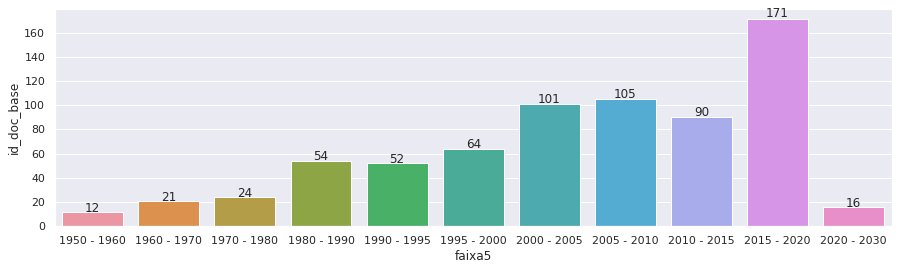

In [365]:
#create vertical barplot
sns.set(rc={'figure.figsize':(15,4)})
p  = sns.barplot(data=dfEstaticiasFaixa5,x="faixa5", y="id_doc_base" ,errorbar=None)

#show values on barplot
show_values(p,'v',.1)


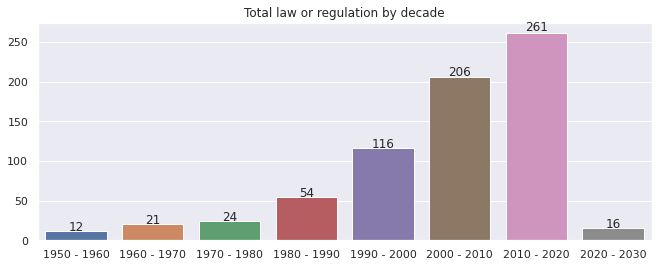

In [368]:
#create vertical barplot
sns.set(rc={'figure.figsize':(11,4)})
p  = sns.barplot(data=dfEstaticiasFaixa10,x="faixa10", y="id_doc_base" ,errorbar=None)
p.set(xlabel=None)
p.set(ylabel=None)
p.set(title='Total law or regulation by decade')
#show values on barplot
show_values(p)
plt.savefig(Path(os.path.join(BASE_DIR,'dataset','results','total_normas_faixa.png')))

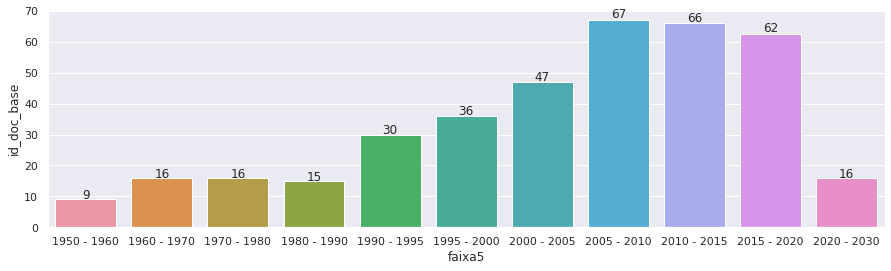

In [237]:
#create vertical barplot
sns.set(rc={'figure.figsize':(15,4)})
p  = sns.barplot(data=dfEstaticiasFaixaVigentes5,x="faixa5", y="id_doc_base" ,errorbar=None)

#show values on barplot
show_values(p)


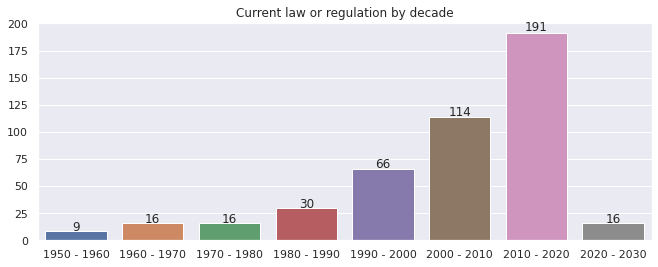

In [381]:
#create vertical barplot
sns.set(rc={'figure.figsize':(11,4)})
p  = sns.barplot(data=dfEstaticiasFaixaVigentes10,x="faixa10", y="id_doc_base" ,errorbar=None)
p.set(xlabel=None)
p.set(ylabel=None)
p.set(title='Current law or regulation by decade')
#show values on barplot
show_values(p)
plt.savefig(Path(os.path.join(BASE_DIR,'dataset','results','normas_ativas_faixa.png')),bbox_inches='tight')


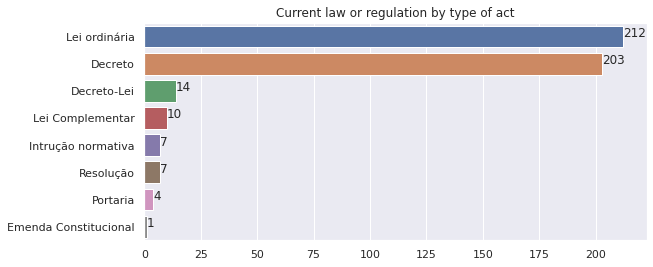

In [370]:
#create vertical barplot
sns.set(rc={'figure.figsize':(9,4)})
p  = sns.barplot(data=dfEstaticiasTipoLeiVigentes,y="tipo_lei", x="id_doc_base", errorbar=None, orient='h', order=dfEstaticiasTipoLeiVigentes.sort_values('id_doc_base',ascending = False).tipo_lei)
p.set(xlabel=None)
p.set(ylabel=None)
p.set(title='Current law or regulation by type of act')
#show values on barplot
show_values(p, orient="h")
# Saving the Seaborn Figure:
plt.savefig(Path(os.path.join(BASE_DIR,'dataset','results','normas_ativas_por_tipo.png')),bbox_inches='tight')

In [371]:
dfEstaticiasTipoLeiVigentes.sort_values('id_doc_base',ascending = False).tipo_lei

5            Lei ordinária
0                  Decreto
1              Decreto-Lei
4         Lei Complementar
3       Intrução normativa
7                Resolução
6                 Portaria
2    Emenda Constitucional
Name: tipo_lei, dtype: object

In [372]:
dfThirdSector.head(1)

,id_sentenca,id_doc_base,tokens_total,tokens_no_stopwords,text_sentenca,cat
index,,,,,,
15318,7077992019_SENT_6056066,7077992019,41,20,"a proposição, a estruturação, a implementação ...",1


In [373]:
dfThirdSector.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2511 entries, 15318 to 1328866
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_sentenca          2511 non-null   object
 1   id_doc_base          2511 non-null   int64 
 2   tokens_total         2511 non-null   int64 
 3   tokens_no_stopwords  2511 non-null   int64 
 4   text_sentenca        2511 non-null   object
 5   cat                  2511 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 137.3+ KB


In [374]:
dfEstatisticasCompleto = dfEstatisticas.merge(dfThirdSector,on="id_doc_base",how="inner")

In [375]:
dfEstatisticasCompleto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2511 entries, 0 to 2510
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2511 non-null   int64  
 1   id_doc_base          2511 non-null   int64  
 2   qtd_not_terc_setor   2511 non-null   int64  
 3   qtd_terc_setor       2511 non-null   int64  
 4   metrica              2511 non-null   float64
 5   faixa                2511 non-null   object 
 6   id                   2511 non-null   int64  
 7   situacao             2511 non-null   object 
 8   tipo_lei             2511 non-null   object 
 9   setor                2511 non-null   int64  
 10  agencia_reguladora   2511 non-null   object 
 11  ano                  2511 non-null   int64  
 12  situacao_infogov     2511 non-null   object 
 13  faixa10              2511 non-null   object 
 14  faixa5               2511 non-null   object 
 15  id_sentenca          2511 non-null   o

In [376]:
dfEstatisticasCompleto.to_excel(Path(os.path.join(BASE_DIR,'dataset','results','dados_regbr_sentencas_estatisticas_third_sector_completo_25092022_v4.xlsx')))

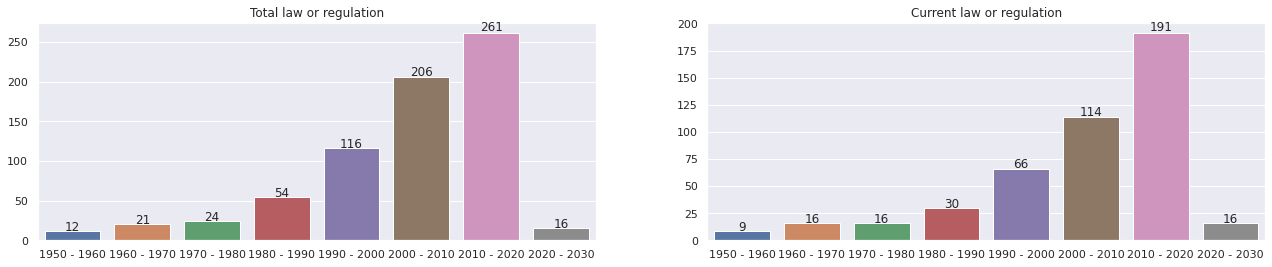

In [380]:
fig, ax = plt.subplots(1,2)

sns.set(rc={'figure.figsize':(24,4)})
p  = sns.barplot(data=dfEstaticiasFaixaVigentes10,x="faixa10", y="id_doc_base" ,errorbar=None,ax=ax[1])
p.set(xlabel=None)
p.set(ylabel=None)
p.set(title='Current law or regulation')
#show values on barplot
show_values(p)

#create vertical barplot
#sns.set(rc={'figure.figsize':(9,4)})

c  = sns.barplot(data=dfEstaticiasFaixa10,x="faixa10", y="id_doc_base" ,errorbar=None,ax=ax[0])
c.set(xlabel=None)
c.set(ylabel=None)
c.set(title='Total law or regulation')
#show values on barplot
show_values(c)


plt.savefig(Path(os.path.join(BASE_DIR,'dataset','results','total_normas_total_ativas_por_faixa.png')))
plt.show()